In [88]:
import numpy as np
import torch
import nibabel as nib
import matplotlib.pyplot as plt
from utils.augmentations import adni_qnat_aug

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [89]:
def show_slice(data, mask=None):
  fig, ax = plt.subplots(figsize=(8,8))
  ax.imshow(data, cmap='gray')
  ax.set_axis_off()
  ax.axes.get_xaxis().set_visible(False)
  ax.axes.get_yaxis().set_visible(False)
  
  if not mask is None:
    c_map = cm.get_cmap('jet')
    mask = np.ma.masked_where( mask < 0.5, mask)
    c_map.set_bad(color='black', alpha=0.0)
    ax.imshow(mask , cmap=c_map, alpha=0.7)

dict_keys(['image', 'mask', 'weight'])
Original data shape :  (256, 256, 180)
Augmented data shape :  (256, 256, 180)
Augmented data shape :  (256, 256, 180)


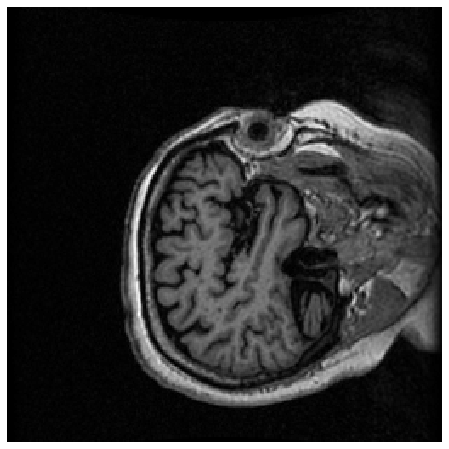

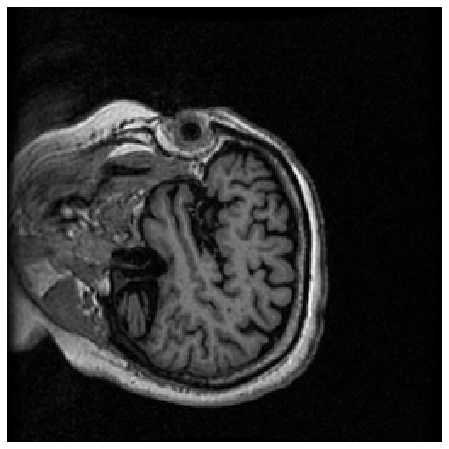

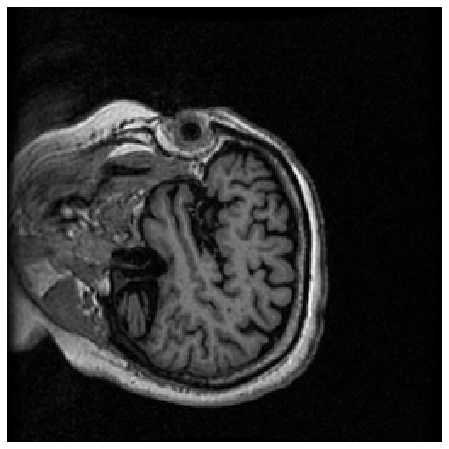

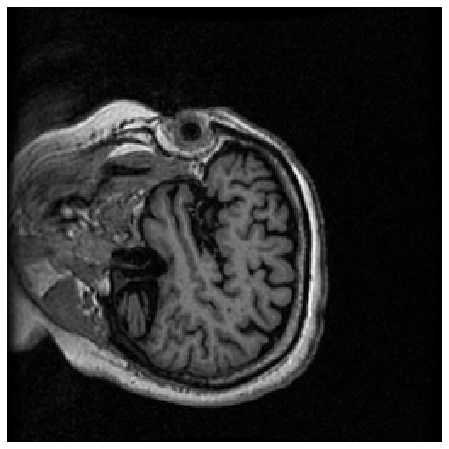

In [104]:
orig_file_path = 'datasets/ADNI/S22389_SCAN0_T1.nii.gz'
orig_data = nib.load(orig_file_path).get_fdata()
#orig_data = np.transpose(orig_data, (2,0,1))
trans = adni_qnat_aug(prob=1, additional_targets={'weight': 'mask'})
augmented = trans(image=orig_data, mask=orig_data, weight=orig_data)
print(augmented.keys())
aug_data = augmented['image']
aug_mask = augmented['mask']
aug_weight = augmented['weight']

print("Original data shape : ", orig_data.shape)
print("Augmented data shape : ", aug_data.shape)
print("Augmented data shape : ", aug_mask.shape)

show_slice(orig_data[:,:,125])
show_slice(aug_data[:,:,125])
show_slice(aug_mask[:,:,125])
show_slice(aug_weight[:,:,125])
